# Dự báo mức lương kỹ sư IT

**Thành viên**

Mai Xuân Trường: Crawl dữ liệu, trực quán hoá đơn biến dữ liệu thô.

Trần Hữu Tuân: Làm sạch và chuẩn hoá dữ liệu, trực quan hoá so sánh trước và sau khi làm sạch và chuẩn hoá.

Đoàn Nguyễn Sơn Hải: Trực quan hoá mối quan hệ đa biến, đưa ra quy các mối quan hệ tiềm ẩn.

# Giới thiệu

Bài toán dự báo mức lương của kỹ sư IT là một bài toán trong lĩnh vực khoa học dữ liệu nhằm dự đoán về mức lương của các nhân viên công nghệ thông tin dựa trên các thông tin có sẵn như địa điểm làm việc, cấp bậc, số năm kinh nghiệm, kỹ năng, hình thức làm việc và giới tính. Bài toán này có thể giúp các doanh nghiệp hoặc ứng viên có cái nhìn tổng quan về mức lương trong ngành công nghệ thông tin, từ đó có thể đưa ra quyết định phù hợp trong việc tuyển dụng, đào tạo và đề xuất chính sách lương thích hợp.

# Crawl dữ liệu

**Tên dataset**: Bộ dữ liệu về Tuyển dụng trong lĩnh vực Công nghệ thông tin từ TopCV

**Nguồn:** từ trang web TopCV (cụ thể là phần việc làm IT)

**Các biến dữ liệu lấy về**

Title: Tiêu đề của bài tuyển dụng.

Link: Đường dẫn đến bài tuyển dụng trên trang web TopCv.

Company: Tên công ty đăng bài tuyển dụng.

Salary: Mức lương hoặc khoảng lương được đề xuất.

Locations: Địa điểm làm việc.

Level: Cấp bậc của vị trí tuyển dụng.

Year of Experience: Số năm kinh nghiệm yêu cầu.

Contract Type: Loại hình làm việc (toàn thời gian, bán thời gian, ...).

Sex: Yêu cầu giới tính.

Skills: Các kỹ năng yêu cầu cho vị trí tuyển dụng.

**Công cụ hỗ trợ crawl dữ liệu**

In [1]:
import pandas as pd
data = pd.read_csv('../data/raw_data_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               7048 non-null   object
 1   Link                7048 non-null   object
 2   Company             7048 non-null   object
 3   Salary              7048 non-null   object
 4   Locations           7048 non-null   object
 5   Level               6968 non-null   object
 6   Year of Experience  6968 non-null   object
 7   Contract Type       6968 non-null   object
 8   Sex                 6968 non-null   object
 9   Skills              6968 non-null   object
dtypes: object(10)
memory usage: 550.8+ KB


Số mẫu bị thiếu thông tin

In [2]:
data['Title'].count() - data['Level'].count()

80

**Những biến quan trọng**

-Salary

-Locations

-Level

-Year of Experience

-Contract Type	

-Sex

-Skills

**Trực quan hoá đơn biến dữ liệu thô**

Import thư viện

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Trực quan dữ liệu biến Salary**

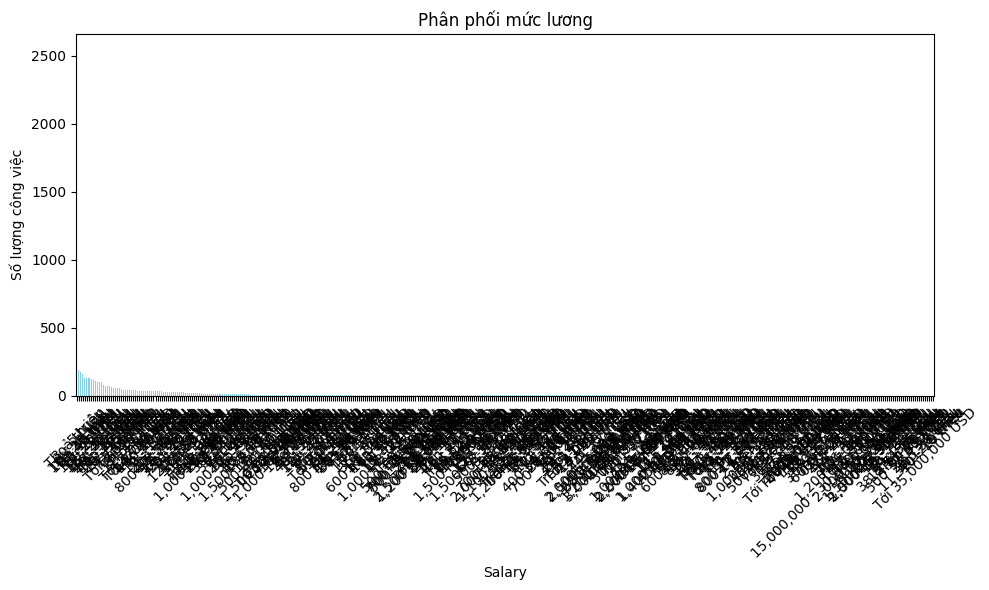

In [4]:
plt.figure(figsize=(10, 6))
data['Salary'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối mức lương')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Số lượng danh mục trong biến

In [5]:
data['Salary'].value_counts()

Salary
Thoả thuận            2536
3 - 5 triệu            187
10 - 20 triệu          177
10 - 15 triệu          161
Tới 30 triệu           133
                      ... 
Tới 35,000,000 USD       1
30 - 38 triệu            1
0.5 - 3 triệu            1
40 - 70 triệu            1
10 - 19 triệu            1
Name: count, Length: 426, dtype: int64

**Trực quan dữ liệu biến Locations**

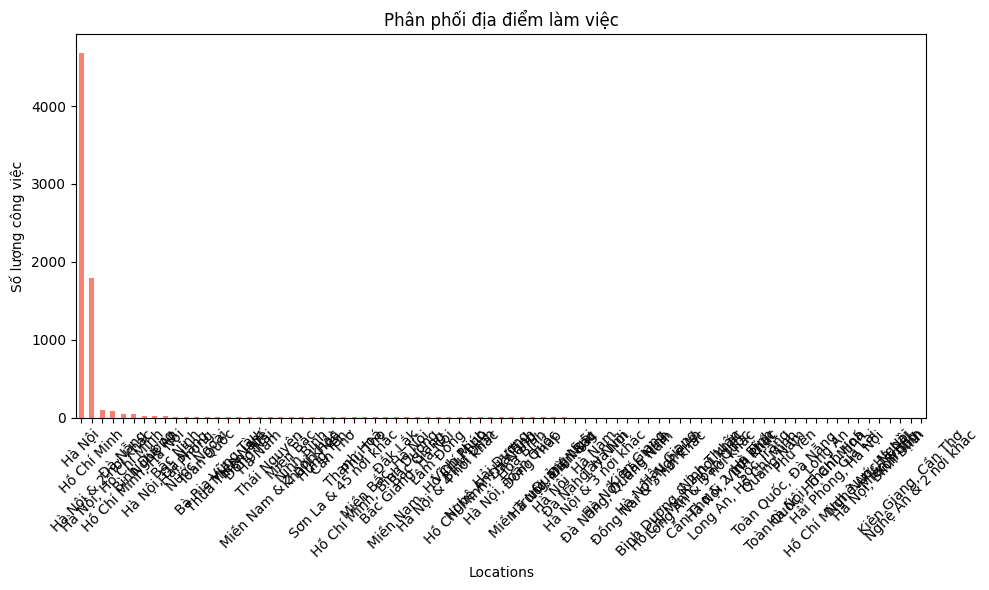

In [6]:
plt.figure(figsize=(10, 6))
data['Locations'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Locations')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối địa điểm làm việc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Số lượng danh mục trong biến

In [7]:
data['Locations'].value_counts()

Locations
Hà Nội                  4685
Hồ Chí Minh             1796
Hà Nội & 2 nơi khác       93
Hà Nội, Hồ Chí Minh       80
Đà Nẵng                   52
                        ... 
Hà Nội, Bình Định          1
Miền Trung                 1
Kon Tum                    1
Kiên Giang, Cần Thơ        1
Nghệ An & 2 nơi khác       1
Name: count, Length: 81, dtype: int64

**Trực quan dữ liệu biến Level**

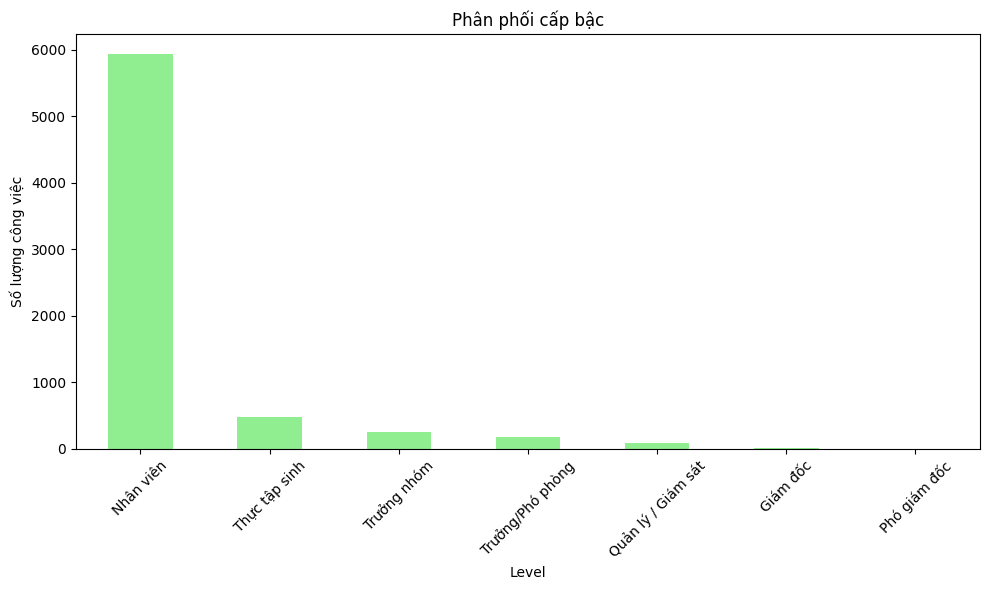

In [8]:
plt.figure(figsize=(10, 6))
data['Level'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Level')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối cấp bậc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Trực quan dữ liệu biến Year of Experience**

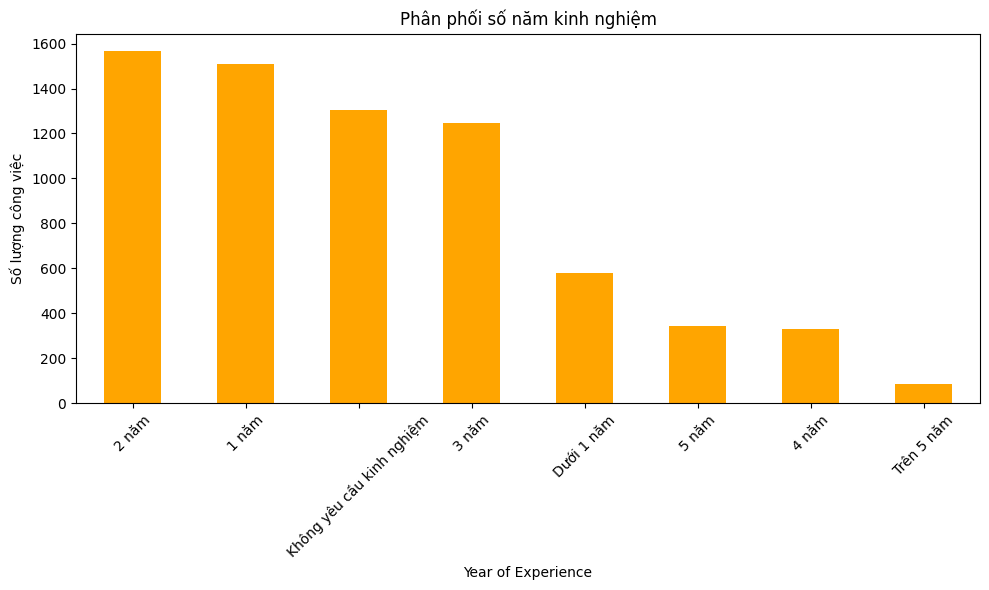

In [9]:
plt.figure(figsize=(10, 6))
data['Year of Experience'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Year of Experience')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối số năm kinh nghiệm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Trực quan dữ liệu biến Contract Type**

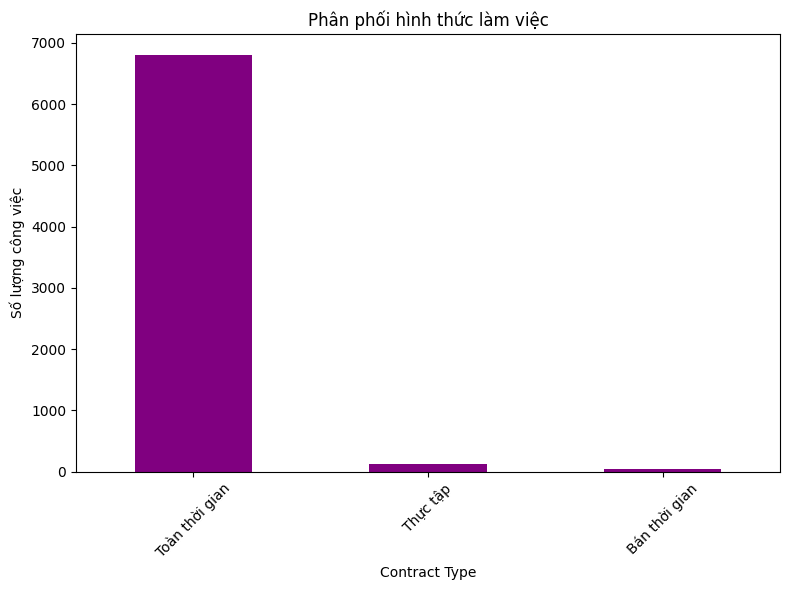

In [10]:
plt.figure(figsize=(8, 6))
data['Contract Type'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Contract Type')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối hình thức làm việc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Trực quan biến sex**

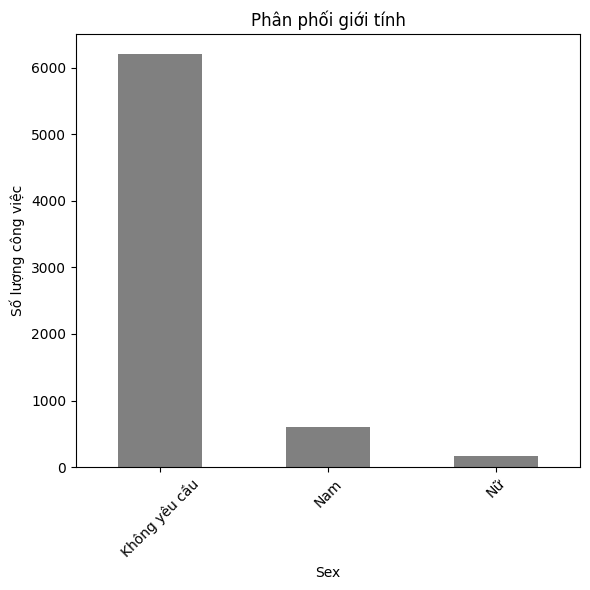

In [11]:
plt.figure(figsize=(6, 6))
data['Sex'].value_counts().plot(kind='bar', color='gray')
plt.xlabel('Sex')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối giới tính')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Làm sạch và chuẩn hoá

- Sau khi làm sạch và chuẩn hóa

In [12]:
jobs_cleaning = pd.read_csv('../data/clean_data_train.csv')

# Lựa chọn biến mục tiêu, biến quan trong

**Biến mục tiêu:** Salary

**Biến không quan trọng:** Sex, Contract Type

**Biến quan trọng:** Location, Programming Language, Language, Year of Experience, Level

- Trực quan hóa biến Sex

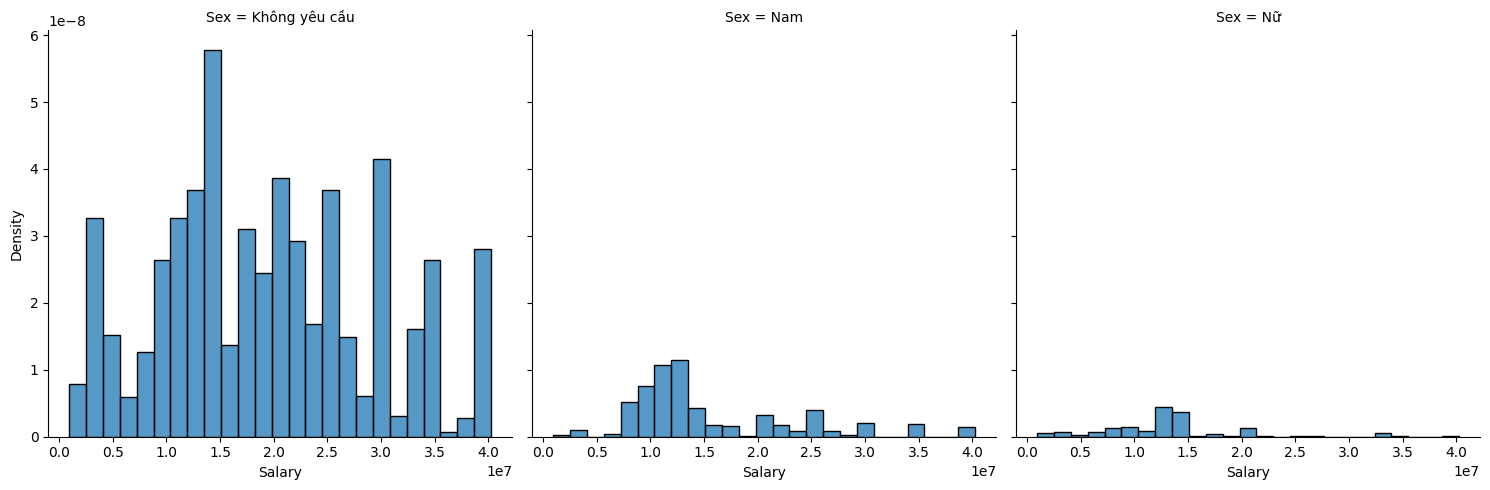

In [13]:
sns.displot(jobs_cleaning, x='Salary', col='Sex', stat="density", fill=True)

**Biến 'Sex' là biến không quan trọng vì:**

Giá trị 'Không yêu cầu' của biến Sex chiếm tỉ trọng lớn

Cả 3 giá trị khác nhau đều phân bố đều trên khoảng lương

- Trực quan hóa biến Contract Type

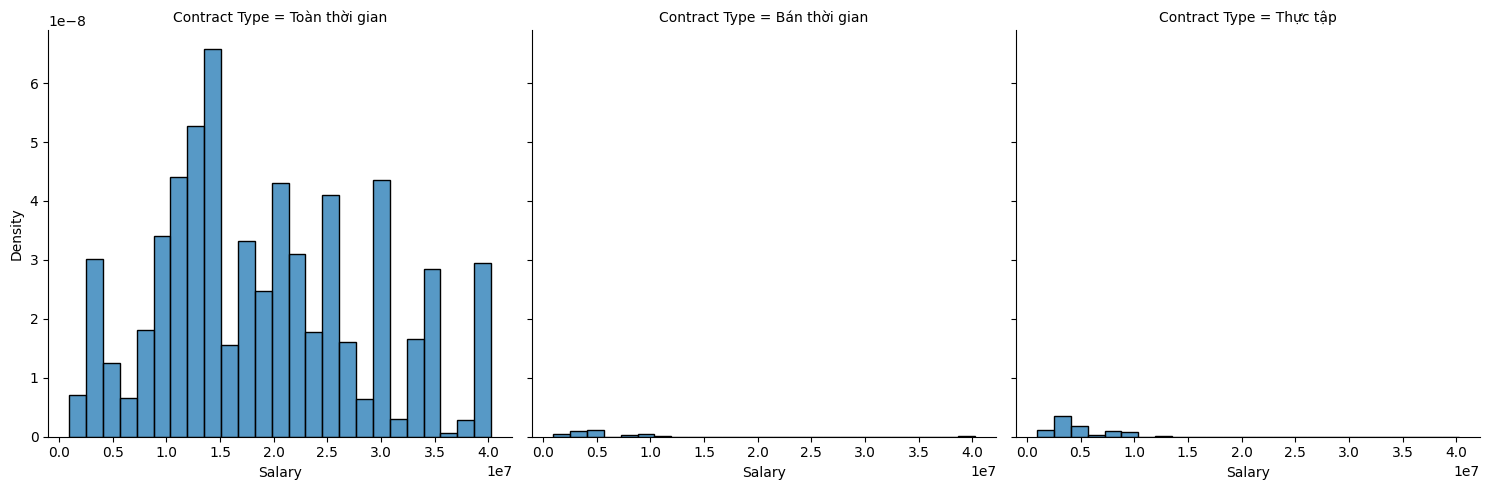

In [14]:
sns.displot(jobs_cleaning, x='Salary', col='Contract Type', stat="density", fill=True)

Giá trị 'Toàn thời gian' của biến Contract Type(loại hợp đồng) chiếm tỉ trọng rất lớn cũng như trải dài đều trên khoảng lương

2 giá trị còn lại không thể hiện rõ sự phân bố

- Trực quan hóa biến Programming Language ảnh hưởng đến Salary

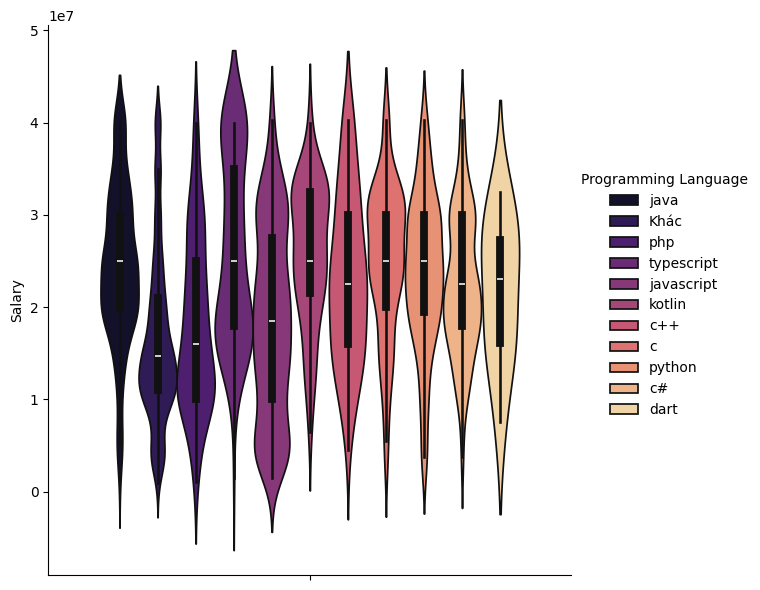

In [15]:
sns.catplot(data=jobs_cleaning, hue="Programming Language", y="Salary", kind="violin", palette='magma', aspect=1, height=6)

Hầu hết, mức lương trung bình của các ngôn ngữ lập trình phổ biến khá ngang nhau (20 - 30 triệu). Tuy nhiên:

Những Job yêu cầu ngôn ngữ lập trình Typescript có lương cao nhất, tập trung ở mức lương cao

Những Job yêu cầu ngôn ngữ lập trình Javascript có mức lương trải đều nhưng mức lương trung bình lại thấp hơn so với mặt bằng chung

Những Job có ngôn ngữ lập trình ít phổ biến hơn thì mức lương ở trung bình khá

- Trực quan hóa biến Location ảnh hưởng đến Salary

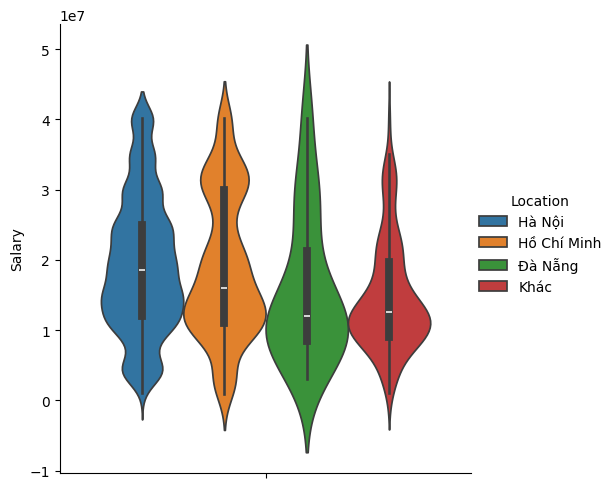

In [16]:
sns.catplot(data=jobs_cleaning, hue='Location', y='Salary', kind="violin")

Mức lương ở 2 thành phố lớn (Hà Nội và Hồ Chí Minh) có mức lương cao hơn so với mặt bằng chung

- Trực quan hóa biến Year of Experience ảnh hưởng đến Salary

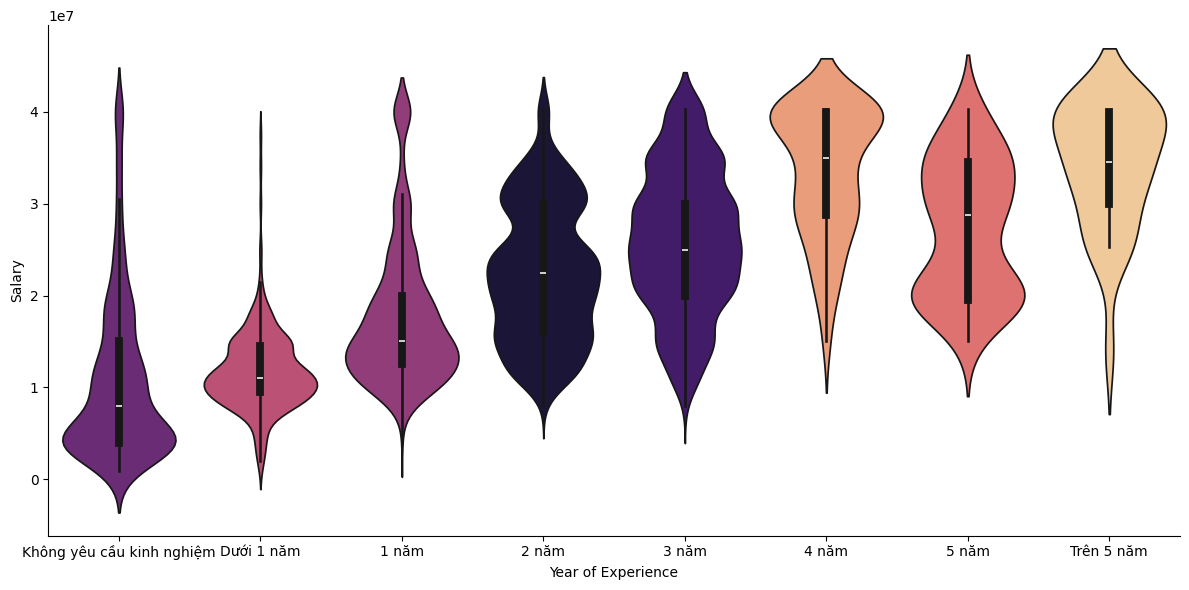

In [22]:
year_of_experience_index = np.array(['Không yêu cầu kinh nghiệm', 'Dưới 1 năm', '1 năm', '2 năm', '3 năm', '4 năm', '5 năm', 'Trên 5 năm'])
sns.catplot(data=jobs_cleaning, hue='Year of Experience', x='Year of Experience', y='Salary', kind="violin", palette='magma', aspect=2, height=6, order=year_of_experience_index) 

Số năm kinh nghiệm càng cao thì dải mức lương càng tập trung ở mức cao. 

Tuy nhiên, số lượng Job càng giảm dần

Đối với kinh nghiệm thấp thì mức lương tập trung ở dải mức lương thấp. Đối với kinh nghiệm từ 2 đến 3 năm thì mức lương phân bố đều ở dài mức lương. Đối với kinh nghiệm càng cao thì mức lương phân bố ở dải cao

- Trực quan hóa biến Level(cấp bậc) ảnh hưởng đến Salary

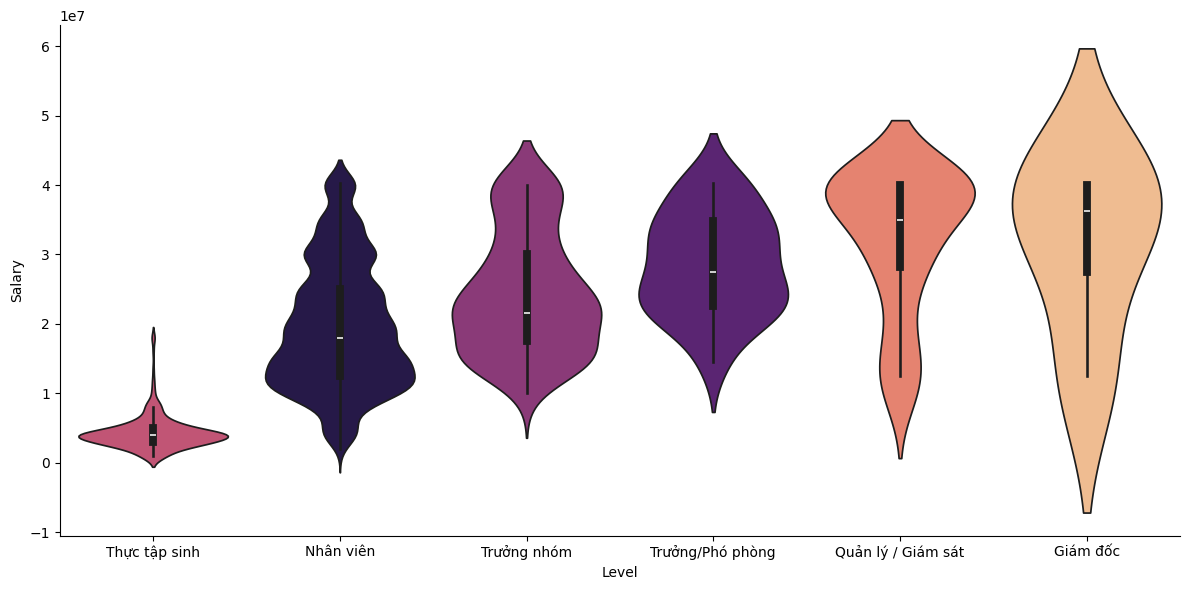

In [23]:
level_index = np.array(['Thực tập sinh', 'Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc'])
sns.catplot(data=jobs_cleaning, x='Level', y='Salary', hue='Level', kind="violin", palette='magma', aspect=2, height=6, order=level_index) 

Ví trí công việc càng cao thì dải mức lương càng tập trung ở mức cao và số lượng Job có giảm dần.

Tuy nhiên, Thực tập sinh có số lượng Job khá là ít so với nhân viên chính thức 

- Ảnh hưởng của Programming Language và Language đối với Salary

Index(['Khác', 'javascript', 'java', 'python', 'c', 'php', 'c#', 'typescript',
       'c++', 'kotlin', 'dart'],
      dtype='object', name='Programming Language')


<Axes: xlabel='Requirement Language', ylabel='Programming Language'>

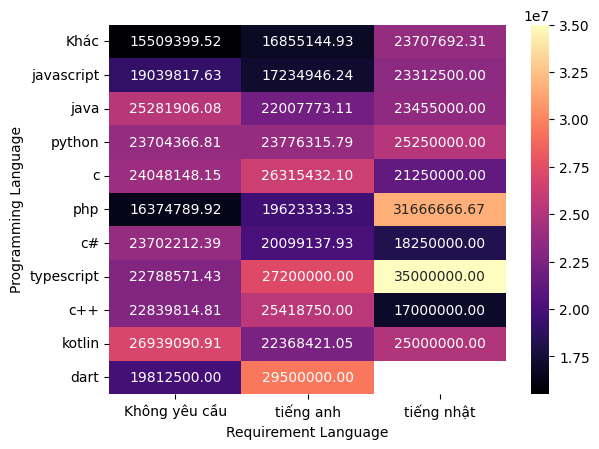

In [19]:
d = jobs_cleaning.groupby(['Programming Language', 'Requirement Language'])['Salary'].mean().unstack()

# Sắp xếp dựa trên giá trị trung bình lương của mỗi ngôn ngữ lập trình
sorted_indices = jobs_cleaning['Programming Language'].value_counts().index

print(sorted_indices)

# Sử dụng indices đã sắp xếp để sắp xếp DataFrame d
d_sorted = d.reindex(sorted_indices)

# Vẽ heatmap với DataFrame đã sắp xếp
sns.heatmap(d_sorted, cmap='magma', annot=True, fmt=".2f")

Mức lương trung bình của những Job không yêu cầu ngoại ngữ thấp hơn các Job yêu cầu ngoại ngữ

Mức lương trung bình của những Job không yêu cầu ngoại ngữ ở mức ngang nhau

Đối với ngoại ngữ 'Tiếng Anh', các ngôn ngữ phổ biến ở top sau có mức lương cao hơn so với ngôn ngữ top đầu

- Ảnh hưởng của Year of Experience và Level đến Salary

Index(['Trên 5 năm', '5 năm', '4 năm', '3 năm', '2 năm', '1 năm', 'Dưới 1 năm',
       'Không yêu cầu kinh nghiệm'],
      dtype='object', name='Year of Experience')


<Axes: ylabel='Year of Experience'>

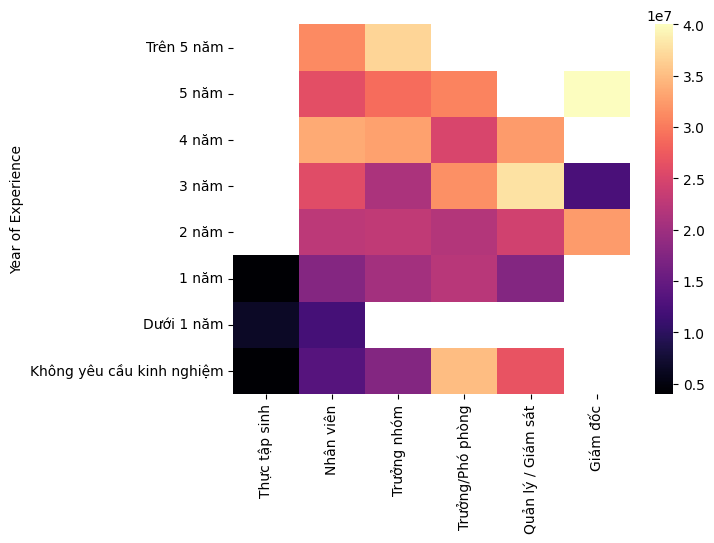

In [20]:
d = jobs_cleaning.groupby(['Year of Experience', 'Level'])['Salary'].mean().unstack()

sorted_indices = pd.Index(np.array(['Trên 5 năm', '5 năm', '4 năm', '3 năm', '2 năm', '1 năm', 'Dưới 1 năm', 'Không yêu cầu kinh nghiệm']), 
                          name='Year of Experience')

sorted_indices_level = pd.Index(np.array(['Thực tập sinh', 'Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc']))

print(sorted_indices)

d_sorted = d.reindex(sorted_indices, columns=sorted_indices_level)

sns.heatmap(d_sorted, cmap='magma')

Số năm kinh nghiệm và cấp bậc càng tăng thì mức lương trung bình càng tăng

Những ô bị thiếu do ở những năm kinh nghiệm nào đó thì không có cấp bậc đó nữa

Ví dụ: Thực tập sinh chỉ đối với những người mà có kinh nghiệm dưới 1 năm

# **Kết luận**

- Programming Language ảnh hưởng đến Salary

Hầu hết, mức lương trung bình của các ngôn ngữ lập trình phổ biến khá ngang nhau (20 - 30 triệu). Tuy nhiên:

Những Job yêu cầu ngôn ngữ lập trình Typescript có lương cao nhất, tập trung ở mức lương cao

Những Job yêu cầu ngôn ngữ lập trình Javascript có mức lương trải đều nhưng mức lương trung bình lại thấp hơn so với mặt bằng chung

Những Job có ngôn ngữ lập trình ít phổ biến hơn thì mức lương ở trung bình khá

- Trực quan hóa biến Location ảnh hưởng đến Salary

Mức lương ở 2 thành phố lớn (Hà Nội và Hồ Chí Minh) có mức lương cao hơn so với mặt bằng chung

- Year of Experience ảnh hưởng đến Salary

Số năm kinh nghiệm càng cao thì dải mức lương càng tập trung ở mức cao. 

Tuy nhiên, số lượng Job càng giảm dần

Đối với kinh nghiệm thấp thì mức lương tập trung ở dải mức lương thấp. Đối với kinh nghiệm từ 2 đến 3 năm thì mức lương phân bố đều ở dài mức lương. Đối với kinh nghiệm càng cao thì mức lương phân bố ở dải cao

- Level(cấp bậc) ảnh hưởng đến Salary

Ví trí công việc càng cao thì dải mức lương càng tập trung ở mức cao và số lượng Job có giảm dần.

Tuy nhiên, Thực tập sinh có số lượng Job khá là ít so với nhân viên chính thức 

- Ảnh hưởng của Programming Language và Language đối với Salary

Mức lương trung bình của những Job không yêu cầu ngoại ngữ thấp hơn các Job yêu cầu ngoại ngữ

Mức lương trung bình của những Job không yêu cầu ngoại ngữ ở mức ngang nhau

Đối với ngoại ngữ 'Tiếng Anh', các ngôn ngữ phổ biến ở top sau có mức lương cao hơn so với ngôn ngữ top đầu

- Ảnh hưởng của Year of Experience và Level đến Salary

Số năm kinh nghiệm và cấp bậc càng tăng thì mức lương trung bình càng tăng

Những ô bị thiếu do ở những năm kinh nghiệm nào đó thì không có cấp bậc đó nữa

**Từ những kết luận trên: Bài toán ở trên là bài toán về Regression**